In [1]:
# from PIL import Image
# PIL 제거 버전 (cv2 사용)

import cv2
import os, glob
import numpy as np

category_dir = "./multi_cnn/train"
categories = ["arm", "bio", "body", "knee", "leg bone", 
              "health,hospital,beauty", "tooth", "head", "face", 
              "cartoon", "adult cartoon",
              "education",
              "bill", "coin", "arrow", "graph",  "invest", "lottery number", "lottery paper", 
              "etc, service, entertain",
              "photo",
             "non_ad"]
len_categories = len(categories)

image_width, image_height = 64, 64

X = []
y = []
sum = 0 

for index, category in enumerate(categories):
    
    label = [0 for i in range(len_categories)]
    label[index] = 1
    
    image_dir = category_dir + "/" + category 
    files = glob.glob(image_dir+"/*.jpg") # 폴더 내 jpg 파일 탐색
    print(category, " 파일 길이: ", len(files)) # 카테코리마다 이미지 파일 개수 표시
    sum += len(files)
    
    for i, f in enumerate(files):
        
        try:
    
            image_bgr = cv2.imread(f, cv2.IMREAD_COLOR) # opencv는 BGR 값으로 받아들임
            image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # RGB 값으로 변환

            img = cv2.resize(image_rgb, (image_width, image_height)) # 딥러닝 모델에 맞게 사이즈 재조정
            data = np.asarray(img)

            X.append(data)
            y.append(label)
            
        except:
            print(category, str(i + 1), "번째에서 에러") # 에러 파일 탐지
            pass

print('총 파일 길이: ', sum)

X = np.array(X)
y = np.array(y)

arm  파일 길이:  18
bio  파일 길이:  10
body  파일 길이:  26
knee  파일 길이:  9
leg bone  파일 길이:  7
health,hospital,beauty  파일 길이:  37
tooth  파일 길이:  12
head  파일 길이:  13
face  파일 길이:  38
face 29 번째에서 에러
cartoon  파일 길이:  7
adult cartoon  파일 길이:  14
education  파일 길이:  6
bill  파일 길이:  36
coin  파일 길이:  6
arrow  파일 길이:  9
graph  파일 길이:  23
invest  파일 길이:  33
lottery number  파일 길이:  18
lottery paper  파일 길이:  28
etc, service, entertain  파일 길이:  122
photo  파일 길이:  310
photo 55 번째에서 에러
non_ad  파일 길이:  538
총 파일 길이:  1320


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(988, 64, 64, 3)
(330, 64, 64, 3)
(988, 22)
(330, 22)


In [3]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [5]:
# VGG 11 모델 생성

# with tf.device('/device:GPU:0'):

"""
    gpu 에러 발생
    gpu의 낮은 성능(gtx 750ti)로 인해
    cpu로 모델 훈련 수행
"""

# model = Sequential()

# model.add(Conv2D(64, (3, 3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
# model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(512, (3, 3), padding="same", activation='relu'))
# model.add(Conv2D(512, (3, 3), padding="same", activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(512, (3, 3), padding="same", activation='relu'))
# model.add(Conv2D(512, (3, 3), padding="same", activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(1000, activation='relu'))
# model.add(Dense(len_categories, activation='softmax'))

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

'\n    gpu 에러 발생\n    gpu의 낮은 성능(gtx 750ti)로 인해\n    cpu로 모델 훈련 수행\n'

In [9]:
# 모델 경량화를 통한 정확도 향상

model = Sequential()

model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len_categories, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)            

In [11]:
history = model.fit(X_train, y_train, epochs=15, batch_size=5, verbose=1, validation_split=0.15)

Epoch 1/10
168/168 [==============================] - 5s 31ms/step - loss: 2.1201 - accuracy: 0.3862 - val_loss: 1.9012 - val_accuracy: 0.4765
Epoch 2/10
168/168 [==============================] - 5s 31ms/step - loss: 1.8876 - accuracy: 0.4744 - val_loss: 1.8053 - val_accuracy: 0.5503
Epoch 3/10
168/168 [==============================] - 5s 30ms/step - loss: 1.7007 - accuracy: 0.5221 - val_loss: 1.7569 - val_accuracy: 0.5570
Epoch 4/10
168/168 [==============================] - 5s 31ms/step - loss: 1.5383 - accuracy: 0.5626 - val_loss: 1.5947 - val_accuracy: 0.5570
Epoch 5/10
168/168 [==============================] - 5s 32ms/step - loss: 1.3070 - accuracy: 0.6103 - val_loss: 1.6278 - val_accuracy: 0.5503
Epoch 6/10
168/168 [==============================] - 6s 34ms/step - loss: 1.1107 - accuracy: 0.6532 - val_loss: 1.5971 - val_accuracy: 0.5839
Epoch 7/10
168/168 [==============================] - 6s 36ms/step - loss: 0.9180 - accuracy: 0.7175 - val_loss: 1.7828 - val_accuracy: 0.5705

In [12]:
model.save("./model_saved.h5")

In [13]:
print(model.evaluate(X_test, y_test , batch_size=5)[1])

66/66 [==============================] - 0s 5ms/step - loss: 2.1117 - accuracy: 0.5121
0.5121212005615234


In [20]:
# from sklearn.metrics import multilabel_confusion_matrix

# prediction = model.predict(X_test)
# cf = multilabel_confusion_matrix(y_true=y_test, y_pred=prediction)

# print(cf)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [14]:
# # Confusion Matrix에 의한 분류

# TP = tf.math.count_nonzero(predicted * actual)
# TN = tf.math.count_nonzero((predicted - 1) * (actual - 1))
# FP = tf.math.count_nonzero(predicted * (actual - 1))
# FN = tf.math.count_nonzero((predicted - 1) * actual)

# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# f1 = 2 * precision * recall / (precision + recall)

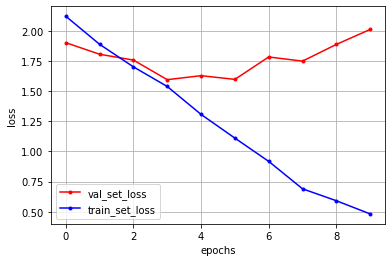

In [15]:
# 모델 손실 표시

import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

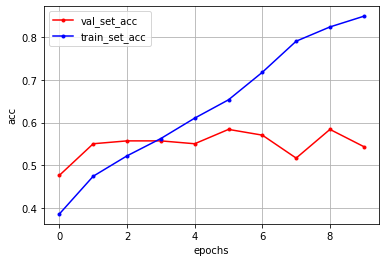

In [16]:
#모델 정확도 표시

y_vacc = history.history['val_accuracy'] # tensorflow 버전 변화로 acc -> accruacy로 변경
y_acc = history.history['accuracy']

x_len = np.arange(len(y_vacc))

plt.plot(x_len, y_vacc, marker='.', c='red', label='val_set_acc')
plt.plot(x_len, y_acc, marker='.', c='blue', label='train_set_acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acc')
plt.grid()
plt.show()

In [17]:
from tensorflow.keras.models import load_model

# 테스트 이미지 분류 -> confusion matrix 평가

category_dir = "./multi_cnn/test"

image_width, image_height = 64, 64

X=[]
filenames = []
files = glob.glob(category_dir+"/*.*") # 테스트 폴더의 이미지 탐색

# opencv 사용, 파일 불러오기

for i, f in enumerate(files):
    
    image_bgr = cv2.imread(f, cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # RGB 값으로 변환
        
    img = cv2.resize(image_rgb, (image_width, image_height))
    data = np.asarray(img)
        
    X.append(data)
    
X = np.array(X)

model = load_model("./model_saved.h5") # 저장된 모델 호출
prediction = model.predict(X)

for i in prediction:
    pre_ans = i.argmax() # 가장 큰 값 저장
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    
    # 해당 카테고리를 구분
    # 특정 부분을 구별하여 하나의 카테고리롤 묶음
    
    if pre_ans == 0 or pre_ans == 1 or pre_ans == 2 or pre_ans == 3 or pre_ans == 4 or pre_ans == 5 or pre_ans == 6 or pre_ans == 7 or pre_ans == 8:
        pre_ans_str = "신체 관련 광고"
    elif pre_ans == 9 or pre_ans == 10:
        pre_ans_str = "만화 광고"
    elif pre_ans == 11:
        pre_ans_str = "교육 광고"
    elif pre_ans == 12 or pre_ans == 13 or pre_ans == 14 or pre_ans == 15 or pre_ans == 16 or pre_ans == 17 or pre_ans == 18:
        pre_ans_str = "금융 광고"
    elif pre_ans == 19:
        pre_ans_str = "상품 광고"
    elif pre_ans == 20:
        pre_ans_str = "포토샵 광고"
    elif pre_ans == 21:
        pre_ans_str = "비광고"
        
    if i[0] >= 0.8 or i[1] >= 0.8 or i[2] >= 0.8 or i[3] >= 0.8 or i[4] >= 0.8 or i[5] >= 0.8 or i[6] >= 0.8 or i[7] >= 0.8 or i[8] >= 0.8: 
        print("해당 이미지는 " + pre_ans_str+"(으)로 추정됩니다.")
    elif i[9] >= 0.8 or i[10] >= 0.8: 
        print("해당 이미지는 " + pre_ans_str+"(으)로 추정됩니다.")
    elif i[11] >= 0.8:
        print("해당 이미지는 " + pre_ans_str+"(으)로 추정됩니다.")
    elif i[12] >= 0.8 or i[13] >= 0.8 or i[14] >= 0.8 or i[15] >= 0.8 or i[16] >= 0.8 or i[17] >= 0.8 or i[18] >= 0.8: 
        print("해당 이미지는 " + pre_ans_str+"(으)로 추정됩니다.")
    elif i[19] >= 0.8: 
        print("해당 이미지는 " + pre_ans_str+"(으)로 추정됩니다.")
    else:
        print("해당 이미지는 " + pre_ans_str+ "(으)로 추정됩니다.")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
20
해당 이미지는 포토샵 광고(으)로 추정됩니다.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
20
해당 이미지는 포토샵 광고(으)로 추정됩니다.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
20
해당 이미지는 포토샵 광고(으)로 추정됩니다.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
20
해당 이미지는 포토샵 광고(으)로 추정됩니다.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
20
해당 이미지는 포토샵 광고(으)로 추정됩니다.
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.5626271e-24 1.0000000e+00]
21
해당 이미지는 비광고(으)로 추정됩니다.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
21
해당 이미지는 비광고(으)로 추정됩니다.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
20
해당 이미지는 포토